In [ ]:
### First we have downloaded a net CDF from the Copernicus Data Store: https://cds.climate.copernicus.eu

In [ ]:
loc_start_year = '2015'
loc_start_month = '01'
loc_end_year = '2015'
loc_end_month = '03'

reference_df = pd.read_csv('data/processed/reference_table/pg___y.csv')
print(reference_df)

#print statement that summarizes the total number of rows appearing in the reference dataframe. 
    # ie. contains x total rows for y unique grid ideas and z until temporal elements


reference_filtered_time = reference_df.loc[
        ((reference_df['year'] == int(loc_start_year)) & (reference_df['month'] >= int(loc_start_month))) &
        ((reference_df['year'] == int(loc_end_year)) & (reference_df['month'] <= int(loc_end_month)))
    ]
print(reference_filtered_time)

In [ ]:
print(reference_df.dtypes)

### Required Changes:

- The complete table should be saved in the directory: `data/generated/index_table_output`
    - The file name must include the start and end dates for easier identification.

- For the functions `generate_etccdi_temporal_tables` and `generate_etccdi_temporal_tables__centroid`:
    - Suppress the printing of each graphic iteration during execution to reduce unnecessary output.

- Ensure that all generated graphics reference a single, consistent scale (legend).

- Issue with validation if:
    - partial years are set in the parameters option 
    - ex. monthly data is allowed but parameters request only part of given year.


# To-Do List

## Decision Tree Development
- Create a **decision tree for defensible methods** based on different applications:
    - If performing at an admin or country scale, use method X.
    - Address the question: "At what scale does the utility of finer-grained PRIOgrid data diminish?" 
    - Incorporate considerations of 'other' shapefile extents.

## API Considerations
- Investigate potential **API changes**:
    1. Ensure the `define_request.py` script is correctly referenced.
    2. Contact CDS to determine their API update schedule (e.g., every 6 months or yearly).
    3. Check the **CDS API forum** for transparency on updates.

## Feature Enhancements
- Add **descriptive statistics**:
    - Include basic summary stats for the requested indices.
- Allow users to view country-specific data:
    - Avoid packaging into larger datasets.
  
## Additional Notes
- Add a **section in the documentation** clarifying how to migrate workflows smoothly.


In [1]:
import pandas as pd
import xarray as xr
import numpy as np

In [2]:
from setup_environment import setup_utils_path
setup_utils_path()

Utils path added to Python Path: /Users/gbenz/Documents/Climate Data/climate_extremes/utils


In [3]:

# Format API Request ----------------------------------------------------------------
from unzip import unzip_etccdi_package
from correct_longitude import transform_longitudinal_values
from temporal_index import find_etccdi_timeindex, translate_index_to_daterange
from define_request import generate_and_validate_request

# Provide Metadata ------------------------------------------------------------------
from give_metadata import give_metadata

# Build API Request -----------------------------------------------------------------
from cds_api_pull import pull_from_cds_api

# Methods ---------------------------------------------------------------------------
from etccdi_to_pg__pointquery import generate_etccdi_temporal_tables__centroid
from etccdi_to_pg import generate_etccdi_temporal_tables

# Validation ------------------------------------------------------------------------
from give_reference_frame import provide_reference_frame
from id_null_values import report_null_etccdi_values

## Access with Copernicus Data Store API:

### You must have both a Copernicus Data Store account and have followed the proceeding instructions on setting up the CDSAPI before you can retrieve and process data from this toolbox. 

#### The following instructions reference the CDSAPI set up guide: https://cds.climate.copernicus.eu/how-to-api


The final objective is to construct a main.py function that accepts the parameters below and automatically computes the process!

## API Request and Processing Parameters

### API Request Parameters
These parameters define the data retrieved via the API request:
- **`variable`**: Specifies the data variable of interest.
- **`product_type`**: Indicates the base product type.
- **`experiment`**: Defines the experimental setup or scenario.
- **`temporal_aggregation`**: Determines the temporal resolution of the data.

### Processing Parameters
These parameters guide the processing workflow:
- **`start_year`**: `'1995'`
- **`start_month`**: `'01'`
- **`end_year`**: `'2000'`
- **`end_month`**: `'12'`

### Method Selection
Choose a resampling or data alignment method:
- **Bilinear sampling**: Applies weighted interpolation for smoother results.
- **Point neighbor**: Maps the closest neighboring value preserving the original coarse resolution.

### (In Development) Extent Selection
Additional options for spatial analysis:
- Empirical distributions based on basin-specific extents.
- Future iterations will enable a 'hotspot' methodology for comparison with global metrics.


## Example of CDS Request

```
import cdsapi

dataset = "sis-extreme-indices-cmip6"
request = {
    "variable": ["cold_days"], 
    "product_type": ["base_period_1961_1990"],
    "model": ["hadgem3_gc31_ll"],
    "ensemble_member": ["r1i1p1f3"],
    "experiment": ["ssp1_2_6"],
    "temporal_aggregation": ["monthly"],
    "period": ["201501_210012"],
    "version": ["2_0"]
}

client = cdsapi.Client()
client.retrieve(dataset, request).download()
```   
``` 
dataset = "sis-extreme-indices-cmip6"
request = {
    "variable": ["consecutive_dry_days"],
    "product_type": ["base_independent"],
    "model": ["hadgem3_gc31_ll"],
    "ensemble_member": ["r1i1p1f3"],
    "experiment": ["ssp1_2_6"],
    "temporal_aggregation": ["yearly"],
    "period": ["2015_2100"],
    "version": ["2_0"]
}
```


### Product Type and Variable Temporal Aggregation

| product_type            | variable                           | temporal_aggregation |
|-------------------------|------------------------------------|----------------------|
| base_independent         | consecutive_dry_days               | annual               |
| base_independent         | consecutive_wet_days               | annual               |
| base_independent         | diurnal_temperature_range          | monthly or annual    |
| base_independent         | frost_days                         | annual               |
| base_independent         | growing_season_length              | annual               |
| base_independent         | heavy_precipitation_days           | annual               |
| base_independent         | ice_days                           | annual               |
| base_independent         | maximum_1_day_precipitation        | monthly or annual    |
| base_independent         | maximum_5_day_precipitation        | monthly or annual    |
| base_independent         | maximum_value_of_daily_maximum_temperature | monthly or annual    |
| base_independent         | minimum_value_of_daily_maximum_temperature | monthly or annual    |
| base_independent         | maximum_value_of_daily_minimum_temperature | monthly or annual    |
| base_independent         | minimum_value_of_daily_minimum_temperature | monthly or annual    |
| base_independent         | number_of_wet_days                 | annual               |
| base_independent         | simple_daily_intensity_index       | annual               |
| base_independent         | summer_days                        | annual               |
| base_independent         | total_wet_day_precipitation        | annual               |
| base_independent         | tropical_nights                    | annual               |
| base_independent         | very_heavy_precipitation_days      | annual               |
| base_period_1961_1990    | cold_days                          | monthly or annual    |
| base_period_1961_1990    | cold_nights                        | monthly or annual    |
| base_period_1961_1990    | warm_days                          | monthly or annual    |
| base_period_1961_1990    | warm_nights                        | monthly or annual    |

The table above defines the `product_type`, `variable`, and the corresponding `temporal_aggregation` classification options for required parameters. Variables that are only available on a yearly basis are labeled as "annual," while others that can be reported on both monthly and annual bases are labeled as "monthly or annual."

### Experiment Period Mapping

| experiment  | period        |
|-------------|---------------|
| historical | 185001_201412 |
| ssp1_2_6   | 201501_210012 |
| SSP2_4_5   | 201501_210012 |
| SSP5_8_5   | 201501_210012 |


In [4]:
p_variable = "summer_days"
p_product_type="base_independent"
p_experiment="ssp1_2_6"
p_temporal_aggregation="yearly"

#-----------------------------------------------------------
# Define Start Year & Month
#-----------------------------------------------------------
start_year = '2015'
start_month = '01'
#-----------------------------------------------------------
# Define End Year & Month
end_year = '2016'
end_month = '04'
#-----------------------------------------------------------
method = 'raster_query' # or raster_query
#-----------------------------------------------------------
save_tif = 'no' # or no
#-----------------------------------------------------------

#country_selection = None

In [5]:
# Now, calling the function will generate and validate the request

request = generate_and_validate_request(
    variable=p_variable,
    product_type=p_product_type,
    experiment=p_experiment,
    temporal_aggregation=p_temporal_aggregation
)
temporal_aggregation_value = request['temporal_aggregation'][0]
print(temporal_aggregation_value)
display(request)

#-------------------------------------------------------------------
# Load a clean PG dataframe at a consistent temporal resolution
# to the request built
#-------------------------------------------------------------------

reference_df = provide_reference_frame(request)

Request is valid.
yearly


{'variable': ['summer_days'],
 'product_type': ['base_independent'],
 'model': ['hadgem3_gc31_ll'],
 'ensemble_member': ['r1i1p1f3'],
 'experiment': ['ssp1_2_6'],
 'temporal_aggregation': ['yearly'],
 'period': ['2015_2100'],
 'version': ['2_0'],
 'data_format': 'netcdf'}

priogrid_gid    int64
year            int64
dtype: object


The zip_file_name will appear in folder:

```
CLIMATE_EXTREMES/
├── data/
│   ├── raw_external/
│   │   └── cds_zip/
```

In [6]:
zip_file_name = pull_from_cds_api(request)

2024-11-20 14:54:37,768 WARNING [2024-11-19T00:00:00] Issue with underlaying infrastructure is now solved. System should gradually recover. Please check updated status [here](https://status.ecmwf.int/)
2024-11-20 14:54:37,768 INFO [2024-09-28T00:00:00] **Welcome to the New Climate Data Store (CDS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202) is key to improve the user experience on the new CDS for the benefit of everyone. Thank you.
2024-11-20 14:54:37,769 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2024-11-20 14:54:37,769 INFO [2024-09-16T00:00:00] Remember that you need to have an ECMWF account to use the new CDS. **Your old CDS credentials will not work in new CDS!**
2024-11-20 14:54:37,770 WARNING [2024-06-16T00:00:00] CDS 

27c8625612bdcd7461123cf706b10d59.zip:   0%|          | 0.00/9.14M [00:00<?, ?B/s]

The netcdf file will appear in folder: 

```
CLIMATE_EXTREMES/
├── data/
│   ├── generated/
│   │   └── netcd/

```

In [7]:
netcdf_file, etccdi_index = unzip_etccdi_package(zip_file_name)

suETCCDI
Extracted file names: suETCCDI_yr_HadGEM3-GC31-LL_ssp126_r1i1p1f3_no-base_v20200114_2015-2100_v2-0.nc


The adjusted netcdf file replaced the original file in location:

```
CLIMATE_EXTREMES/
├── data/
│   ├── generated/
│   │   └── netcd/
```

In [8]:
etccdi = transform_longitudinal_values(etccdi_index, netcdf_file)

The variable 'suETCCDI' was found in the file path and the world continues to spin.
Original Latitude range: -89.375 to 89.375
Original Longitude range: 0.9375 to 359.0625
Adjusted Longitude range: -179.0625 to 179.0625
Adjusted dataset saved to: /Users/gbenz/Documents/Climate Data/climate_extremes/data/generated/netcdf/adjusted_suETCCDI_yr_HadGEM3-GC31-LL_ssp126_r1i1p1f3_no-base_v20200114_2015-2100_v2-0.nc.nc


In [9]:
give_metadata(etccdi)

Latitude range: -89.375 to 89.375
Longitude range: -179.0625 to 179.0625
Latitude resolution: 1.25
Longitude resolution: 1.875
Global Metadata:
CDI: Climate Data Interface version 1.8.0 (http://mpimet.mpg.de/cdi)
history: Tue Nov 24 09:31:53 2020: cdo mergetime tasmax_day_HadGEM3-GC31-LL_ssp126_r1i1p1f3_gn_20150101-20491230.nc tasmax_day_HadGEM3-GC31-LL_ssp126_r1i1p1f3_gn_20500101-21001230.nc ./merged/tasmax_day_HadGEM3-GC31-LL_ssp126_r1i1p1f3_gn_20150101-21001230.nc
2020-01-13T09:55:40Z ; CMOR rewrote data to be consistent with CMIP6, CF-1.7 CMIP-6.2 and CF standards.;
2020-01-13T09:53:59Z MIP Convert v1.2.3, Python v2.7.12, Iris v1.13.0, Numpy v1.13.3, netcdftime v1.4.1.
source: HadGEM3-GC31-LL (2016): 
aerosol: UKCA-GLOMAP-mode
atmos: MetUM-HadGEM3-GA7.1 (N96; 192 x 144 longitude/latitude; 85 levels; top level 85 km)
atmosChem: none
land: JULES-HadGEM3-GL7.1
landIce: none
ocean: NEMO-HadGEM3-GO6.0 (eORCA1 tripolar primarily 1 deg with meridional refinement down to 1/3 degree in the 

## Include month attribute on pg__m.csv reference sheet!

In [10]:
index_list, reference_filtered_time, report_temporal_dimensions = translate_index_to_daterange(etccdi, reference_df, temporal_aggregation_value, start_year, start_month, end_year, end_month)

No data found for 01 of the year 2015 but located data for the first available month.
Validation: Found data for Year: 2015, Month: 06 at index 0.

No data found for 04 of the year 2016 but located data for the first available month.
Validation: Found data for Year: 2016, Month: 06 at index 1.

The start index is: 0, and references 06 (month) of 2015 (year)

The end index is: 1, and references 06 (month) of 2016 (year)



### Params:

- time_index_list,
- netcdf, climate_index, 
- shapefile_path



Raster files:
```
CLIMATE_EXTREMES/
├── data/
│   ├── generated/
│   │   └── index_raster_output/
```

Final output table:
```
CLIMATE_EXTREMES/
├── data/
│   ├── generated/
│   │   └── index_table_output/
```


Processing time index: 0
Year: 2015 Month: 06
CRS is not set. Setting CRS to EPSG:4326


/Users/gbenz/Documents/Climate Data/climate_extremes/utils/etccdi_to_pg__pointquery.py:115: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf.geometry.centroid
/Users/gbenz/miniforge3/envs/viewser/lib/python3.11/site-packages/rasterstats/io.py:335: NodataWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn(


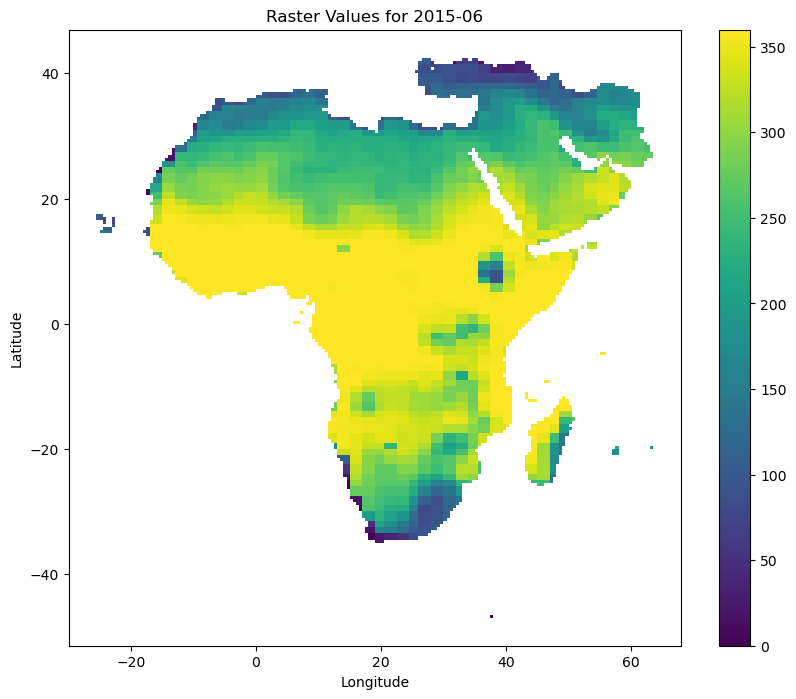

Processing time index: 1
Year: 2016 Month: 06
CRS is not set. Setting CRS to EPSG:4326


/Users/gbenz/Documents/Climate Data/climate_extremes/utils/etccdi_to_pg__pointquery.py:115: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf.geometry.centroid


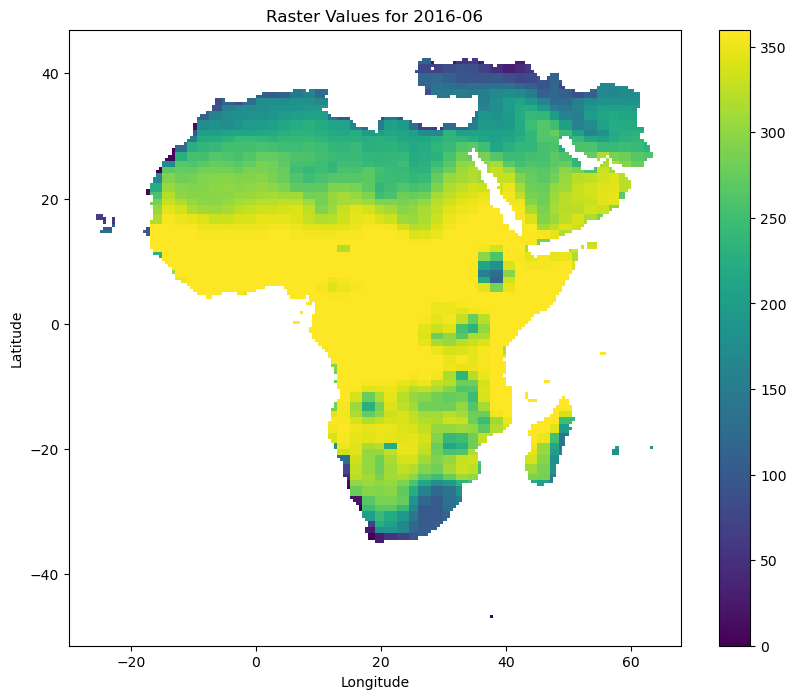

Final DataFrame saved to: /Users/gbenz/Documents/Climate Data/climate_extremes/data/generated/index_table_output/suETCCDI_yearly_201506_201606__centroid_process.csv
suETCCDI_yearly_201506_201606__centroid_process.csv
All graphics saved to /Users/gbenz/Documents/Climate Data/climate_extremes/docs/Graphics/Standard_review/suETCCDI_layout.pdf


In [11]:
if method == 'raster_query':
    translated_filename = generate_etccdi_temporal_tables__centroid(index_list, etccdi, etccdi_index, report_temporal_dimensions,  'no')

elif method == 'resample':
    translated_filename = generate_etccdi_temporal_tables(index_list, etccdi, etccdi_index, save_tif)

else: 
    print('you have entered a bad prompt for the method parameter. Please restart.... ')

``translated_filename`` retrieves the summary table saved to:


``reference_filtered_time`` retrieves the primary reference table saved to:

In [12]:
report_null_etccdi_values(translated_filename, reference_filtered_time, temporal_aggregation_value)

Total number of null values in 'validate_etccdi' DataFrame: 0
Total number of null values in 'validate_etccdi' DataFrame: 0
therefore, there is no null summary dataframe to report here!


## Now you can migrate to the ingestion script

We want to intentionally keep these things seperate (lock / key) so unwanted things are not automatically ingested

- **Clarify migration to the ingestion script**:


In [ ]:
print( "Now you are ready to run the ingestion code located in .... ")